###  Remember: jupyter notebooks

- To run the currently highlighted cell, hold <kbd>&#x21E7; Shift</kbd> and press <kbd>&#x23ce; Enter</kbd>.
- To get help for a specific function, place the cursor within the function's brackets, hold <kbd>&#x21E7; Shift</kbd>, and press <kbd>&#x21E5; Tab</kbd>.

### Remember: Search engines are your friends

- When you'd like to know if there is a function for numpy that solves a particular problem, try searching for 'numpy' + a couple of keywords describing your problem. There's a good chance that the first result will be a numpy documentation page!

# NOTE:

Lines starting with # are commented, meaning that they are not executed when the block of code is run; they are used for explaining what a part of code is doing:

```python
# This adds b and c, and puts the result into a
a = b + c
```

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Numpy

Note: most of the following exercises on numpy were taken from:

http://www.labri.fr/perso/nrougier/teaching/numpy.100/

If you feel like you'd like to test your numpy knowledge, check it out.

#### Exercise

Create a 3x3 matrix with values ranging from 1,9

In [2]:
# First create a numpy array from 1 to 10 (10 excluded), then reshape it into a 3x3 matrix
a = np.arange(1,10).reshape((3,3))
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


#### Exercise

Find indices of non-zero elements from [1,2,0,0,4,0]

In [3]:
a = np.array([1,2,0,0,4,0])

# We can use the nonzero() function to find the indexes of all elements of a that are different from zero
z = np.nonzero(a)

print(z, a[z])

(array([0, 1, 4]),) [1 2 4]


#### Exercise

Create a 10x10 array with random values and find the minimum and maximum values

In [4]:
# We can use the random.rand() function
a = np.random.rand(10, 10)

# We can now call the min() and max() methods of a
print(a.min(), a.max())

0.005642999716543806 0.9972360188249663


#### Exercise

Create a 8x8 matrix and fill it with zeros and ones with a checkerboard pattern. Visualize the result using the function plt.spy()

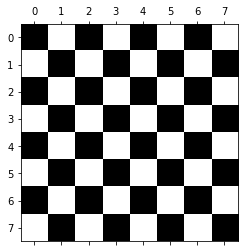

In [5]:
# First we create an 8x8 matrix of 0s
a = np.zeros((8,8))

# Now we can use the fact that in a checkboard pattern, the black elements are the ones where 
# the row index and the column index are both odd or both even, so if we start from 0 and use a step = 2
# when indexing we can access easily the 'both even' elements. We can then access the 'both odd' elements
# using a step of 2 but starting with 1
a[0::2, 0::2] = 1
a[1::2, 1::2] = 1

# This can be also done with for loops, it is slower but clearer:
for i in range(8):
    for j in range(8):
        
        # Both even
        if i % 2 ==0 and j % 2 == 0:
            a[i,j] = 1
            
        # Both odd
        if i % 2 ==0 and j % 2 == 0:
            a[i,j] = 1

plt.spy(a)
plt.show()

#### Exercise

Build a 1D array of random integers between 1 and 10 (included) and negate all elements which are between 3 and 8, in place.

In [6]:
# First we generate the array. Note that randint generates value up to the maximum exluded, so we have to set it to 11
a = np.random.randint(1, 11, size = 100)

# Now we build two arrays of boolean values which indicate where our 'inversion' condition happens
cond1 = a >= 3
cond2 = a <= 8

# We create a single 2x100 array out of the two conditions
cond = np.array([cond1, cond2])

# Now we can use np.all(); this will verify whether all the elements in an array are true, and if so it returns true (it is
# basically an 'and' operator). we can also select the axis we want to operate on. In this case we want to work on columns, so
# axis = 0
indexes_invert = np.all(cond, axis = 0)

# Finally, we can multiply all the elements of a identified by True values inside indexes_invert by -1
a[indexes_invert] *= -1


print(a)

[ 2 10 -6 -7 -6 -3 -5 -6 -4  1 -5 -4  2 -4  1 10  9 -4 10 -3 -5 -7 -7  1
  2  9  2 -4  1  9 -7 -3 10 -8  9 -4  2  1  1  2 -7 -5 -3 -6 -6 -3  9 -8
  9 -3 -6  1 10 -7 -5 -3 -7 -7 -7  9 -7 -8 10  9  2  2  9 -4 10  1 -7 -7
 -4 -6 10  2 -5 -7 -3  9 -5 -7 -7 -3 -3  9  1 -8 -7 -4  9 -3 10  2  9 -3
 -8  9  2 10]


#### Exercise

Create a vector of size 9 with ordered values ranging from 0 to 1, both excluded

In [7]:
# We can solve this in many ways; one of those is to use linspace to generate 11 values between 0 and 1, and then we can
# remove the first and last element of the array
a = np.linspace(0, 1, num = 11)[1:-1]

print(a)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


#### Exercise

Create a random vector of size 10 and sort it

In [8]:
# We can create the array using random.rand
a = np.random.rand(10)

# We can now sort it in place (thus saving us memory) by calling the array's 'sort()' method
a.sort()

print(a)

[0.03388044 0.0696389  0.12502544 0.14100696 0.18654609 0.30865783
 0.32312662 0.47819287 0.65170959 0.79868814]


#### Exercise

Create a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates

In [9]:
# First we create a random 10x2 matrix
a = np.random.rand(10,2)

# Now we can calculate the radius by taking the norm over the rows of the matrix
radius = np.linalg.norm(a, axis = 1)

# and the angle by calculating the arctan of the second row over the first one
angle = np.arctan(a[:,0]/a[:,1])

# Finally, we can put them back together into a single matrix
polar = np.array([radius, angle])

# A touch of finesse: we also transpose 'polar', so that the data are back into the
# format we started with: first dimension = number of points, second dimension = number of coordinates

polar = polar.T

print(polar)

[[1.25239873 0.77511586]
 [0.50679005 0.41179521]
 [0.99261117 0.27281681]
 [0.98341353 0.49751295]
 [0.36527027 0.66395961]
 [0.90260731 0.2098186 ]
 [0.4676432  0.48414969]
 [0.92322327 0.60094884]
 [0.67459834 0.48396711]
 [0.72171651 0.7335349 ]]


#### Exercise

Create random vector of size 10 and replace the maximum value by 0

In [10]:
# Create a random array
a = np.random.rand(10)

# We can use the argmax() function to find the index of the largest element in the array
# Note: if two elements are the same, argmax will return the first one it encounters
index_max = np.argmax(a)

# Finally we access that element through its index and set it to 0
a[index_max] = 0

print(a)

[0.09171318 0.90119888 0.67931096 0.39439895 0.30525612 0.5147356
 0.03011755 0.54748734 0.         0.04441141]


# Classes

#### Exercise

Write a class Dog that requires a 'name' and 'breed' strings to be initialized. Add methods to it, such as 'bark' and 'play', that print some information about what the dog is doing. Use an 'if' statement in the 'bark' method so that the breeds 'st. bernard' and 'chihuahua' will have a different output from the standard class 'bark'

In [11]:
# Define the Dog class as a subclass of object, which is a reserved python word that indicates the most general class possible
# This class is going to have two properties, 'name' and 'breed', that are going to be stored at initialization and then
# will be used in the two functions
class Dog(object):
    
    # Define the initialization method that takes two arguments and sets the name and breed properties
    def __init__(self, name, breed):
        self.name = name
        self.breed = breed
        
    # Define the play method
    def play(self):
        print(self.name + ' is having a great time!')
    
    # Define the bark method. This checks for different possible breeds and then prints a different string according to the
    # breed property of the class
    def bark(self):
        
        if self.breed == 'st. bernard':
            print('Wooof')
            
        elif self.breed == 'chihuahua':
            print('Yap '*100)
                
        else:
            print('Bark')
            
            
            
            
# Create a Dog instance (that is, a variable of type 'Dog') initializing it with a name and breed, and call its methods
# as a test
my_dog = Dog('Tinkerbell', 'chihuahua')

my_dog.play()
my_dog.bark()

Tinkerbell is having a great time!
Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap 


Note on class inheritance: when defining a class ChildClass that inherits from ParentClass

```python
class ChildClass(ParentClass):
    
    ### New Methods go in here
    
```

ChildClass will have all the methods of ParentClass, and then you can add methods to ChildClass inside its class body. Methods with the same name as methods in ParentClass will overwrite the ones from ParentClass

#### Exercise

Now, instead of having the if statement inside the bark method, create the Chihuahua and StBernard class that inherit from the class Dog, and have them overwrite its 'bark' method so that they have a different behaviour, and their initializer so that they only require a 'name' and the 'breed' is automatically set to 'st. bernard' and 'chihuahua'

In [12]:
# Define the same Dog class as before, but now the 'bark' method is simpler
class Dog(object):
    
    def __init__(self, name, breed):
        self.name = name
        self.breed = breed
        
    def play(self):
        print(self.name + ' is having a great time!')
    
    def bark(self):
        print('Bark')
        
# Now create a Chihuahua class, which is a subclass of Dog. This means that Chihuahua will have the same methods as Dog, but
# we will overwrite some of them
class Chihuahua(Dog):
    
    # Overwrite the initialization method so that the user only needs to input the name, and the breed is set to a constant
    def __init__(self, name):
        Dog.__init__(self, name, 'chihuahua')
    
    # Overwrite the 'bark' method to have the behaviour we expected from a chihuahua
    def bark(self):
        print('Yap '*100)
        
class StBernard(Dog):
    
    def __init__(self, name):
        Dog.__init__(self, name, 'st. bernard')
        
    def bark(self):
        print('Wooof')

# create three dogs, one for each of our classes, and call their 'bark' methods to check whether we implemented it correctly
dogs = [StBernard('Beethoven'), Chihuahua('Tinkerbell'), Dog('Dogmeat', 'german shepherd')]

for dog in dogs:
    dog.bark()

Wooof
Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap Yap 
Bark


#### Exercise

Build a 2D point class. It must accept as an initializer a 2-element iterable (if None, initialize the point with random values), and have:

- 'x' and 'y' properties
- a 'norm' property that returns the norm of the point
- a 'distance' method that calculates the distance between the point and another given point

Write a 'rotate' function that accepts an angle in radians and returns a rotated point around the (0,0) center by that angle


In [13]:
class Point2D(object):

    def __init__(self, point_coords):
        
        x, y = point_coords
        self.x = x
        self.y = y
        
        # In the initialization, after we set the 'x' and 'y' properties, we can also calculate their norm
        # and store it in the 'norm' property of the point
        self.norm = np.linalg.norm([self.x,self.y])

    # we now add the 'distance' method that asks the user for another point and calculates the distance between the
    # user-given point and the point whose method we call
    def distance(self, point):
        return np.linalg.norm([self.x-point.x, self.y-point.y])
        
        
# We now define a function that given a point and an angle, returns a rotated point
def rotate(point, angle):
    c, s = np.cos(angle), np.sin(angle)
    rotation_mat = np.array([[c,-s],[s,c]])
    new_x, new_y = rotation_mat @ [point.x, point.y]
    return Point2D([new_x, new_y])

a = Point2D([1,1])
print(a.x, a.y)
print(a.norm)
print(a.distance(Point2D([-1,1])))

b = rotate(a, -np.pi)
print(b.x, b.y)

1 1
1.4142135623730951
2.0
-0.9999999999999999 -1.0000000000000002


#### Exercise

Build an ellipse class, initialized by (axis1, axis2), with methods that return the perimeter and the surface of the ellipse. 
Build a sphere class that inherits the ellipse class, but overwrites the initialization method with a simpler one that only requires one value and creates and ellipse using that to set both the axes.

Note: ellipse perimeter is approximately $\pi*(3(a+b) - \sqrt{((3a+b)(a+3b))})$

Write a 'ratio' function that calculates the perimeter to surface area and test wether it works with both ellipses and spheres.
Build a square class that's not a subclass of the ellipse, but has the same methods. Does the 'ratio' function work with a square too?

In [14]:
class Ellipse(object):
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def per(self):
        return np.pi * (3 * (self.a + self.b) - np.sqrt((3 * self.a + self.b) * (self.a + 3 * self.b)))
    
    def surf(self):
        return np.pi * self.a * self.b
    


class Sphere(Ellipse):
    
    # We want to rewrite the initialization method for the sphere so that the user only needs to input one 
    # argument (= the radius) as this completely describes our sphere. We thus call the Ellipse initialization method
    # and we pass it the radius two times, since a sphere is just an ellipse with axis1 = axis2
    def __init__(self, radius):
        Ellipse.__init__(self, radius, radius)
        
        
    
def ratio(ellipse):
    return ellipse.per() / ellipse.surf()



class Square(object):
    
    def __init__(self, l):
        self.l = l
    
    def per(self):
        return 4 * self.l
    
    def surf(self):
        return self.l * self.l
    

print(ratio(Ellipse(3,5)))
print(ratio(Sphere(4)))

# This works on a square too, since python just checks whether the object that we pass to the function has the 'per' and 'surf' 
# methods and doesn't care whether it's an ellipse
print(ratio(Square(4)))

0.5416994755741638
0.5
1.0


# Matplotlib

#### Exercise

Use the logspace function to generate 100 spaced integers between $10^{2}$ and $10^{6}$. For each of these values estimate 20 possible values of pi using the solution of yesterday's miniproject. Calculate the mean and variance of your pi estimate corresponding to each value.

Visualize the mean and variance; use the plt.plot function for the mean, and the variance using the plt.fill_between function.

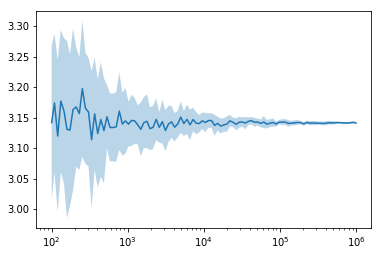

In [15]:
# We use the function from yesterday's miniproject
def estimate_pi(N):
    a = np.random.rand(N, 2)
    b = np.linalg.norm(a, axis = -1)
    pi_estimate = np.sum(b < 1)/N*4
    return pi_estimate

# We create our logspaced array
how_many_logspaced = 100
datapoints = np.logspace(2, 6, how_many_logspaced, dtype = int)


# For every value in the logspaced array, we want 20 attempts, thus we create a 100x20 matrix to store the results of our
# pi estimations
how_many_attempts = 20
results = np.empty((how_many_logspaced,how_many_attempts))

# iterate twice, once over the logspaced array, the other over the number of attempts
for i, d in enumerate(datapoints):
    for j in range(how_many_attempts): 
        # Store our values
        results[i,j] = estimate_pi(d)

        
# Calculate mean and standard deviation of our estimates
results_mean = results.mean(1)
results_std = results.std(1)

# plot the mean
plt.plot(datapoints, results_mean)

# fill the graph between (mean - std) and (mean+std)
plt.fill_between(datapoints,
                 results_mean - results_std,
                 results_mean + results_std,
                 alpha = 0.3   # this makes the filled area more transparent
                )  

# Set the xaxis to logarithmic scale for better visualization
plt.xscale('log')

plt.show()

#### Exercise

Generate an array 'x' of linearly distributed points. Create a function that linearly transforms x and then add some gaussian noise on top of it, with the variance of the noise being the original value of x. Plot the resulting data distribution.

Use the function np.linalg.lstsq() to solve the least squares problem needed to find the line that best fits the generated data. Plot the resulting line over the data distribution.

Note that the lstsq function is meant to be used for solving a linear matrix equation y = Ax; our problem has a different format, being y = mx + q.
This function can be used anyway to solve our problem  by formulating it as

y = [m , q] [x, 1] = mx + q

Remember: in Jupyter, access the documentation of a function by pressing <kbd>&#x21E7; Shift</kbd> + <kbd>&#x21E5; Tab</kbd> with the cursor in the function arguments

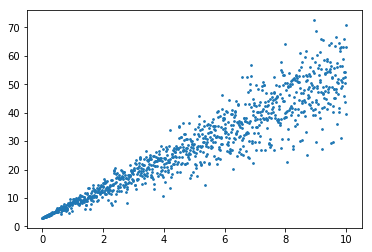

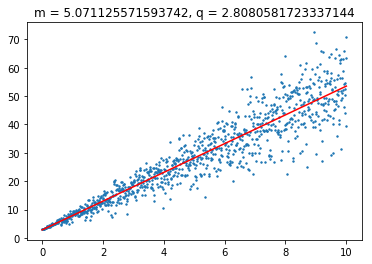

In [16]:
# Create an array with 1000 points between 0 and 10
x = np.linspace(0, 10, 1000)

# Build y as a linear transformation of x
m = 5.
q = 3.
y = m*x + q 

# Add some random gaussian values to y; the variance of the gaussian is equal to x, so we will see points that are further from 
# the line when x increases
y += np.random.standard_normal(size = x.shape) * x

# Visualize our points
plt.scatter(x,y, s = 3)
plt.show()

# Build a matrix with [x, 1] values, so that the lstsq() function can find both a reconstructed m and reconstructed q
data_matrix = np.array([x, np.ones_like(x)])

# Use lstsq to find the m and q values that minimize the sum of squared distances between the original points
# lstsq returns a lot of information, but we only want m_rec and q_rec, so we only save the first returned value
w = np.linalg.lstsq(data_matrix.T, y, rcond=None)[0]
m_rec, q_rec = w

# Now we reconstruct the line and plot it over the distribution of points
line = m_rec * x + q_rec
plt.scatter(x,y,s = 2)
plt.plot(x,line,'r-')
plt.title('m = {}, q = {}'.format(w[0],w[1]))
plt.show()

#### Exercise

Generate a sine wave, with gaussian noise added to it. Plot the resulting wave and ensure that the noise isn't covering the original function, while still affecting it.

Fit polynomials with different orders over your generated data; you can do this easily by using the functions np.polyfit, which fits a polynomial of a given order to some datapoints, and np.poly1d, which builds a polynomial class on top of some weights.

Plot the different polynomials in subplots to compare their performance over the original data.

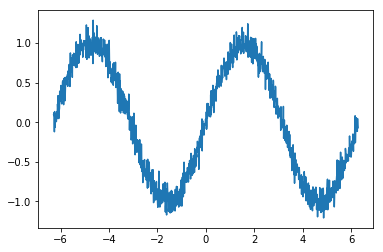

/storage/mi/pasquali/miniconda3/envs/deeptime/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


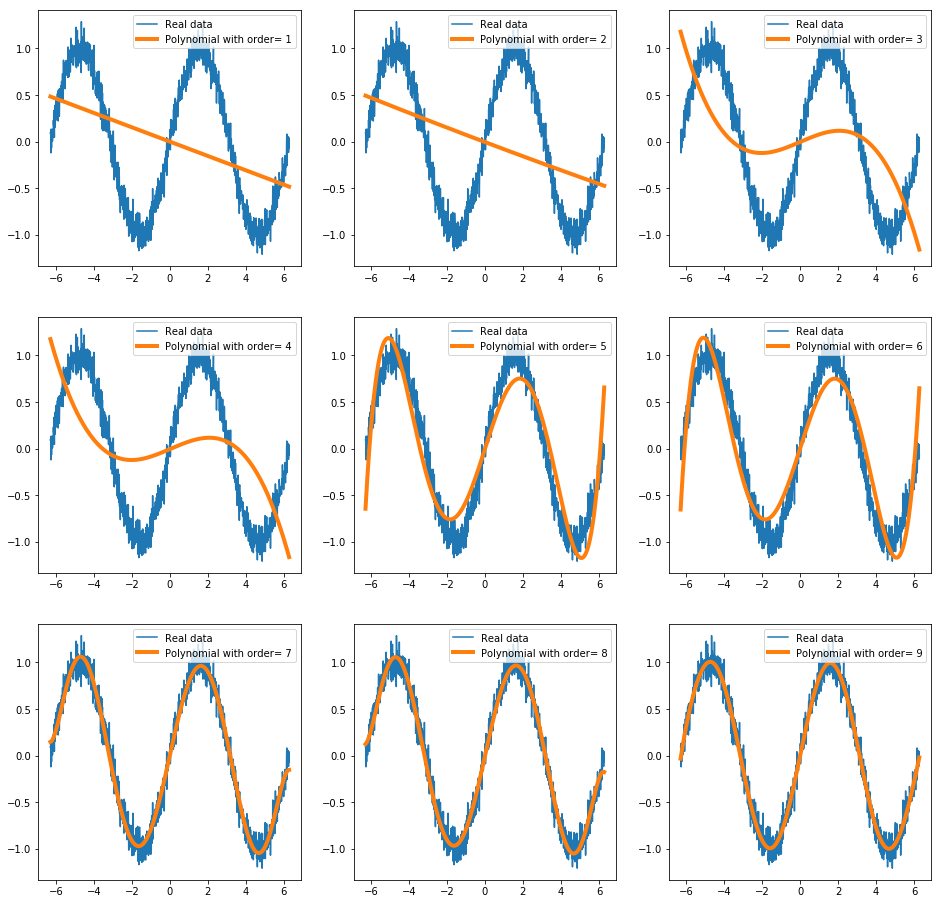

In [17]:
# Create an x-axis for our problems, made of point between -2pi and 2pi spaced by 0.1 between them
x = np.arange(-2*np.pi, 2*np.pi, 0.01)

# Calculate the sine of the x-axis and add small gaussian noise on top
y = np.sin(x) + 0.1 * np.random.standard_normal(size = x.shape)

# Plot x and y so as to verify we didn't add too much noise
plt.plot(x, y)
plt.show()


# Create a 3x3 subplots figure
# plt.subplots returns an axis object, which is actually a 3x3 matrix of plots. We can plot data in each of these by accessing
# them like we would access the elements of a matrix
fig, ax = plt.subplots(3, 3, figsize = (16,16))

# Iterate over the rows and columns of our plots matrix, and plot a polynomial estimation for each of them
for n in range(3):
    for k in range(3):
        
        # Calculate a different degree of the polynomial for each plot
        poly_order = 3*n+k+1
        z = np.polyfit(x, y, poly_order)
        p = np.poly1d(z)
        
        # When trying to plot inside an 'axis' object, you can call most of plt. methods on the axes object, and 
        # the results will appear in the axis instead
        ax[n, k].plot(x, y, label = 'Real data')
        ax[n, k].plot(x, p(x), lw = 4, label = 'Polynomial with order= {}'.format(poly_order))
        ax[n, k].legend()

fig.show()

# Miniprojects

## Colorful Flock

Write a transformation that, given a 1D array $x$

- Calculates $ y = \sqrt{2*|x|}$
- Adds Gaussian noise to $y$, with variance 0.1
- Generate a random integer between 0 and 40, and add it to $x$
- Generate another random integer between 0 and 40, and add it to $y$
- Rotates $x,y$ by $\frac{\pi}{6}$ degrees using a rotation matrix:
 
$$\begin{bmatrix}
    \cos{\theta} & \sin{\theta} \\
    -\sin{\theta} & \cos{\theta}
\end{bmatrix}$$
    
- Returns the transformed $x,y$ pair

Now, for 40 times, generate 1000 random values for x and transform them, and plot the transformed data using the function plt.scatter() and setting the size = 1; in the end, use plt.show() to visualize the whole plot.

In [18]:
# First we write the transformation function
def transform(x):
    # Calculate 2*abs(x) on the whole x
    y = np.sqrt(2.*np.abs(x))
    
    # Add some gaussian noise to y
    y +=  0.1 * np.random.standard_normal(len(y))
    
    # Create a 30° rotation matrix 
    degree = np.pi/6
    rot_matrix = np.array([[np.cos(degree),np.sin(degree)],[-np.sin(degree), np.cos(degree)]])
    
    # Draw two random integers and add them to x and y
    x += np.random.randint(0, 40)
    y += np.random.randint(0, 40)
    
    # Rotate together x and y by using the matrix product operator
    # When used between numpy arrays, the '@' symbol is a shortcut for applying matrix multiplication
    # a @ b behaves exactly like np.dot(a,b)
    rotated_xy = rot_matrix @ np.array([x, y])
    
    return rotated_xy

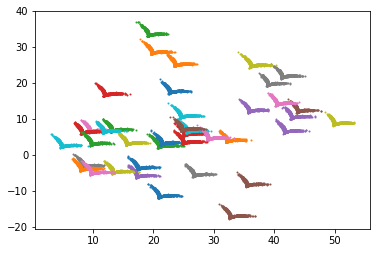

In [19]:
datapoints = int(1e3)

# Now, for 40 times
for i in range(40):
    # Generate 1000 random points between 0 and 1
    x = np.random.randn(datapoints)
    
    # Transform them and return the two transformed coordinates
    y,z = transform(x)
    
    # Scatter plot the two transformed coordinates with size = 1.
    # Note that every time we call plt.scatter, the color of the points changes
    plt.scatter(y,z, s=1)
    
# Et Voila'!
plt.show()

Generate points from three different 2-D gaussians (hint: you can multivariate_normal function in the np.random package):

- Centered in (-3, 0) with covariance ((0.1, 0), (0, 5))
- Centered in (3, 6) with covariance ((1, 0.5), (0.5, 2))
- Centered in (3, 9) with covariance ((1, 0.5), (0.5, 2))

Visualize them on the (X,Y) plane with different colors for each gaussian

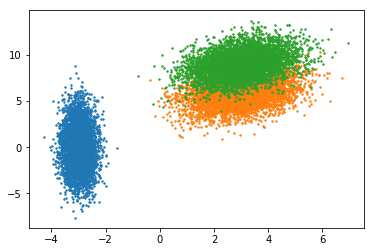

In [20]:
# We can use the multivariate_normal function to generate a gaussian distribution over multiple dimensions. This is described 
# by a 'mean' vector, that indicates the position of the center of the gaussian, and a 'covariance' matrix, that basically
# describes the shape of the gaussian

g1 = np.random.multivariate_normal(mean = [-3, 0],  cov = [[0.1, 0], [0, 5]], size  = 5000)
g2 = np.random.multivariate_normal(mean = [3, 6],   cov = [[1, 0.5], [0.5, 2]], size  = 5000)
g3 = np.random.multivariate_normal(mean = [3, 9],   cov = [[1, 0.5], [0.5, 2]], size  = 5000)

# Now we use scatter to visualize our gaussians. To do so we need to pass the first column as x values, and the second column
# as y values

plt.scatter(g1[:,0], g1[:,1], s = 2)
plt.scatter(g2[:,0], g2[:,1], s = 2)
plt.scatter(g3[:,0], g3[:,1], s = 2)
plt.show()

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set.

Use the previously generated multi-gaussian dataset as a base to apply PCA on. The implementation of PCA is as follows:

- Remove the mean from each feature of the dataset
- Calculate the covariance matrix of the mean-free dataset
- Calculate eigenvectors and eigenvalues of the covariance matrix; the magnitude of the eigenvalues indicate how much 'variance' is mapped by the related eigenvector
- Use the eigenvectors as a basis set to transform the original data
- Plot the eigenvectors over the original dataset distribution, so as to visually confirm that the PCA is successfully identifying the best directions (be wary of transpositions!)

Plot the transformed dataset in the PCA space

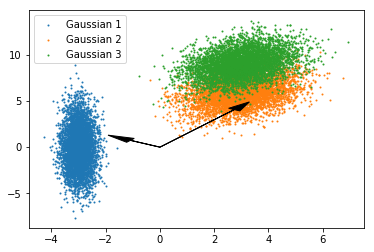

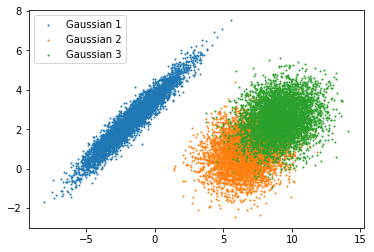

In [21]:
# We want to have all the datapoints in a single sequence
all_gaussians = np.concatenate((g1,g2,g3), axis = 0)

# Now we define a PCA function that operates on a certain dataset and returns the most 'important' transformed dimensions
def PCA(data, dims_rescaled_data=2):
    
    m, n = data.shape
    
    # First we remove the mean from each dimension of our data
    data -= data.mean(axis=0)
    
    # Now we calculate the covariance matrix. NOTE: without rowvar = False, this would try to calculate the covariance
    # on the rows instead of the columns, thus giving us a 15000x15000 matrix. That's a bit slow!
    R = np.cov(data, rowvar=False)
    
    # Now we calculate eigenvectors and eigenvalues of the covariance matrix. Note: eigh is a function that is optimized
    # for decomposing symmetrical matrices, and since a covariance matrix is always symmetrical this will be faster
    evals, evecs = np.linalg.eigh(R)
    
    # We sort the eigenvalues, and then sort the eigenvectors accordingly. We do this because the eigenvalues tell us how
    # much information is stored in each eigenvector, and we want to have the ones with the most information first
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    
    # We want only the dimensions that we consider relevant
    evecs = evecs[:, :dims_rescaled_data]
    evals = evals[:dims_rescaled_data]
    
    # We now transform the original data into the eigenvector space
    transformed_data = data @ evecs
        
    # return everything we calculated
    return transformed_data, evals, evecs


# Use the function to transform all our data
t_data, evals, evecs = PCA(all_gaussians)

plt.scatter(g1[:,0], g1[:,1], s = 1, label = 'Gaussian 1')
plt.scatter(g2[:,0], g2[:,1], s = 1, label = 'Gaussian 2')
plt.scatter(g3[:,0], g3[:,1], s = 1, label = 'Gaussian 3')


# We want to add arrows on our plot that show us how our eigenvectors are oriented with respect to our gaussians. We use the 
# plt.arrow function to do so.
for length, vector in zip(evals, evecs.T):
    
    # We use the eigenvector as our arrow direction and eigenvalue as module
    v = vector * np.sqrt(length)
    
    # We plot the arrows so that they originate from the mean of our point distribution
    plt.arrow(all_gaussians.mean(0)[0],
              all_gaussians.mean(0)[1], 
              v[0],
              v[1],
              head_width=0.5, head_length=1, fc='k', ec='k')
    
plt.legend()
plt.show()

# Transform our data so that they are a linear combination of the eigenvectors
t_g1 = g1 @ evecs
t_g2 = g2 @ evecs
t_g3 = g3 @ evecs

# Visualize the transformed gaussians
plt.scatter(t_g1[:,0], t_g1[:,1], s = 1, label = 'Gaussian 1')
plt.scatter(t_g2[:,0], t_g2[:,1], s = 1, label = 'Gaussian 2')
plt.scatter(t_g3[:,0], t_g3[:,1], s = 1, label = 'Gaussian 3')

plt.legend()
plt.show()

## The Game of Life

(from Wikipedia)

The Game of Life, also known simply as Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970. It is the best-known example of a cellular automaton. The "game" is actually a zero-player game, meaning that its evolution is determined by its initial state, needing no input from human players. One interacts with the Game of Life by creating an initial configuration and observing how it evolves.

The universe of the Game of Life is a two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, alive (1) or dead (0). Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

- **Any live cell with fewer than two live neighbours dies**, as if by needs caused by underpopulation.
- **Any live cell with more than three live neighbours dies**, as if by overcrowding.
- **Any live cell with two or three live neighbours lives**, unchanged, to the next generation.
- **Any dead cell with exactly three live neighbours becomes a live cell**.

The initial pattern constitutes the 'seed' of the system. The first generation is created by applying the above rules simultaneously to every cell in the seed – births and deaths happen simultaneously, and the discrete moment at which this happens is sometimes called a tick. (In other words, each generation is a pure function of the one before.) The rules continue to be applied repeatedly to create further generations.

#### Exercise

Implement a simple version of the game of life, and initialize it with a 100x100 random matrix of 0-1 values (use the numpy.random.randint function for this). Execute a number of steps and see how your system is evolving over time by printing the total number of cells (ones) in your Petri dish (matrix). You can visualize the position of your cells by calling the function spy() from the matplotlib package on your matrix

Try changing the size of the matrix to 1000x1000. Is the simulation becoming slow?

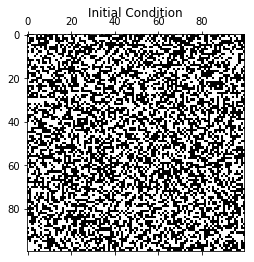

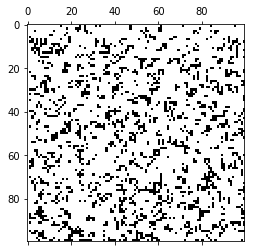

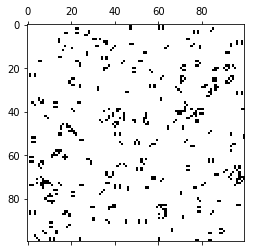

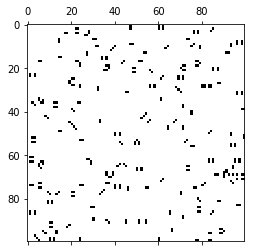

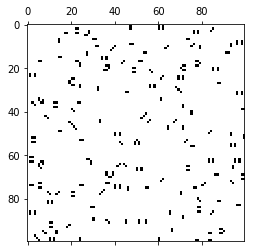

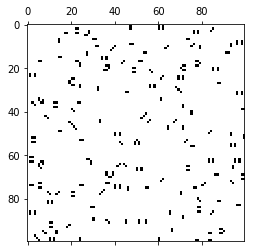

In [22]:
steps = 100
map_size = 100

# Generate a random matrix of 0s and 1s
initial_cond = np.random.randint(0, 2, size = (map_size,map_size))

# Visualize the initial condition
plt.spy(initial_cond)
plt.title('Initial Condition')
plt.show()

# Nested for solution

# The outer loop is one iteration per evolution steps
for k in range(steps):
    
    # We initialize an empty matrix where we can store the future state of the system
    new_cond = np.empty_like(initial_cond)
    
    # Now, for every element in the matrix
    for i in range(map_size):
        for j in range(map_size):
            
            # Count the neighbours of each cell
            neighbours_count = np.sum(initial_cond[i-1:i+2, j-1:j+2])
                        
            # set the value of the cell in the next step according to the number of neighbours
            new_cond[i,j] = 2 <= neighbours_count <= 3 if initial_cond[i,j] == 1 else neighbours_count ==3
    
    # Update the system
    initial_cond = new_cond
    
    
    # Visualize the system every 20 steps
    if not k%20:
        plt.spy(initial_cond)
        plt.show()

#### Exercise

An optimized version can be implemented by making the 'dead boundary' assumption, meaning that the values on the boundary of the map will always be zero.

This allows to calculate the number of neighbours for $z_{i,j}$ for all i,j simultaneously. This is done by adding up together the submatrices of Z, shifted by 1 element in every of the 8 directions.

As an example, think of how calculating the neighbours of a 3x3 matrix is adding up together the 8 1x1 matrices surrounding the center. In the same way, calculating the neighbours for a 10x10 matrix is adding up together the 8 8x8 matrices that are shifted from the center, the neighbours of a 100x100 matrix are calculated adding up the 8 98x98 matrices shifted from the center, and so on.

Use this faster neighbour calculation to implement an optimized version of the game of Life using a single for loop. Do you see any performance improvements on a 1000x1000 matrix?

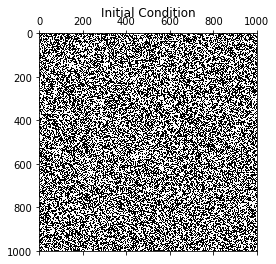

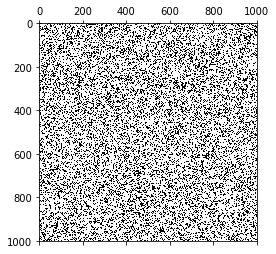

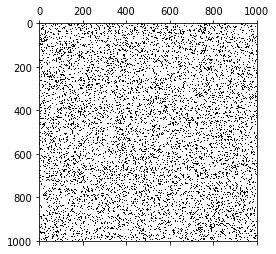

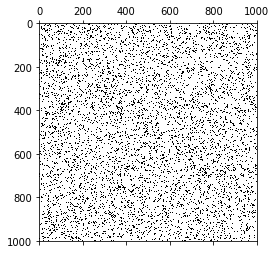

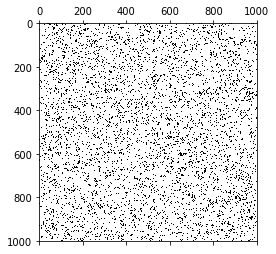

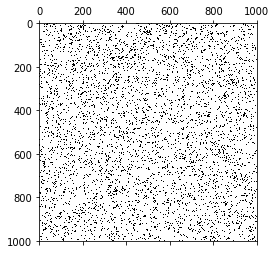

In [23]:
steps = 100
map_size = 1000

# Generate a random matrix of 0s and 1s
initial_cond = np.random.randint(0, 2, size = (map_size,map_size))

# Visualize the initial condition
plt.spy(initial_cond)
plt.title('Initial Condition')
plt.show()

# Optimized solution

# This function evolves our system Z by one step
def evolve_system(Z):
    
    # Add up the 8 shifted matrices
    N = (Z[0:-2,0:-2] + Z[0:-2,1:-1] + Z[0:-2,2:] +
         Z[1:-1,0:-2]                + Z[1:-1,2:] +
         Z[2:  ,0:-2] + Z[2:  ,1:-1] + Z[2:  ,2:])
    
    # Now N[i,j] indicates how many neighbours the element Z[i,j] has
    
    # Apply the conditions to each element in N
    # We check the conditions with the bitwise logical operators since it's faster
    birth = (N==3) & (Z[1:-1,1:-1]==0)
    survive = ((N==2) | (N==3)) & (Z[1:-1,1:-1]==1)
    
    # Reset Z to all 0s and then update its values
    Z = np.zeros_like(Z)
    Z[1:-1,1:-1][birth | survive] = 1
    return Z


# Now this loop iterates over the number of simulation steps that we want
# For each time we call the 'evolve_system' function on our initial condition and update it
for k in range(steps):
    initial_cond = evolve_system(initial_cond)
    
    # Visualize the system every 20 steps
    if not k%20:
        plt.spy(initial_cond)
        plt.show()